In [1]:
import pandas as pd
from utils.data_loader import load_data

df, config, features = load_data()

In [2]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

# only take rows where class != predicted_class
df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

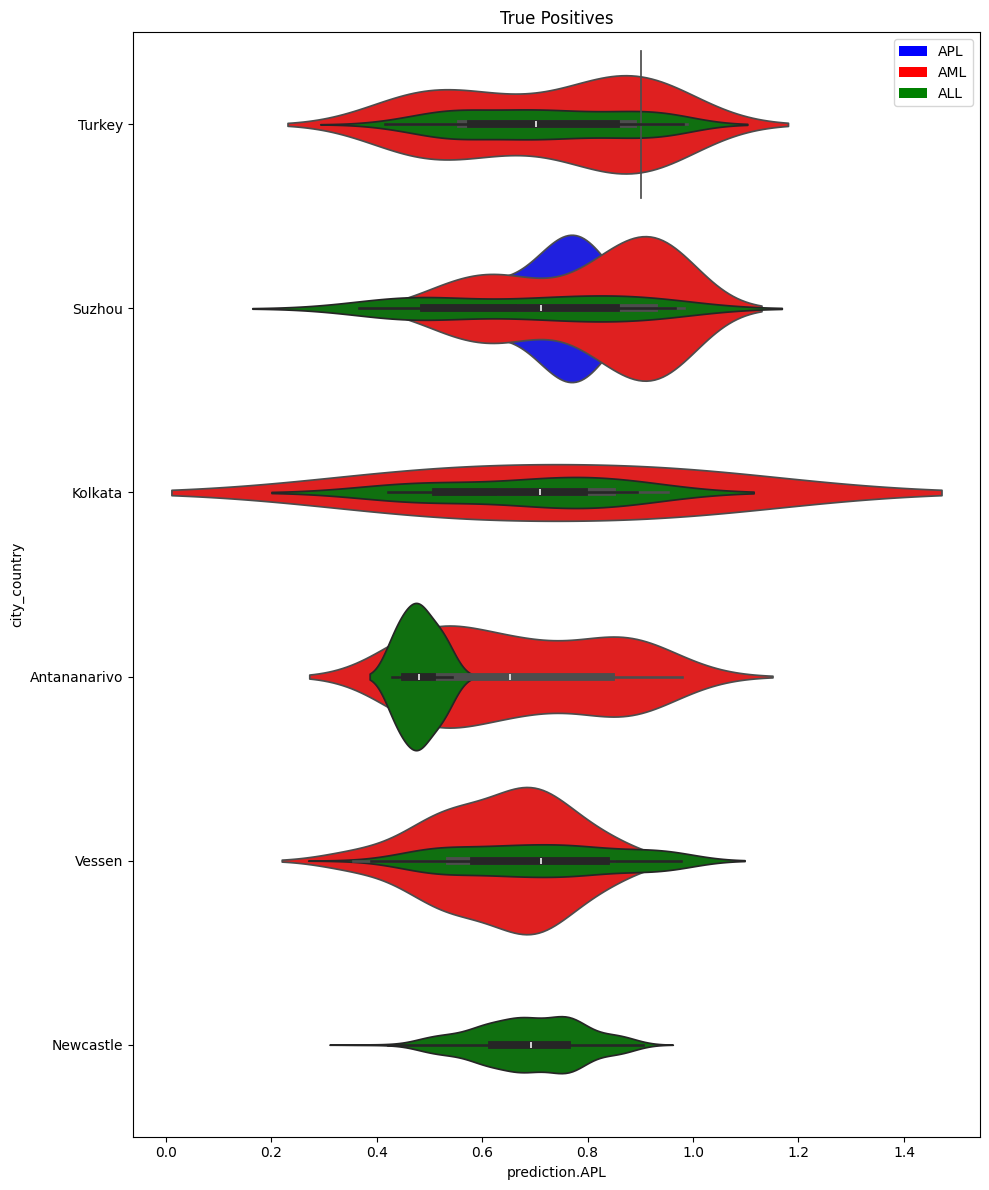

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

plt.figure(figsize=(10, 12))

# Define colors for each class
colors = {'APL': 'blue', 'AML': 'red', 'ALL': 'green'}

# Create separate violin plots with specific colors
apl_true = df_true[df_true['class'] == 'APL']
sns.violinplot(x='prediction.APL', y='city_country', data=apl_true, color=colors['APL'])

aml_true = df_true[df_true['class'] == 'AML']
sns.violinplot(x='prediction.AML', y='city_country', data=aml_true, color=colors['AML'])

all_true = df_true[df_true['class'] == 'ALL']
sns.violinplot(x='prediction.ALL', y='city_country', data=all_true, color=colors['ALL'])

# Create custom legend handles
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_elements)

plt.title('True Positives')
plt.tight_layout()

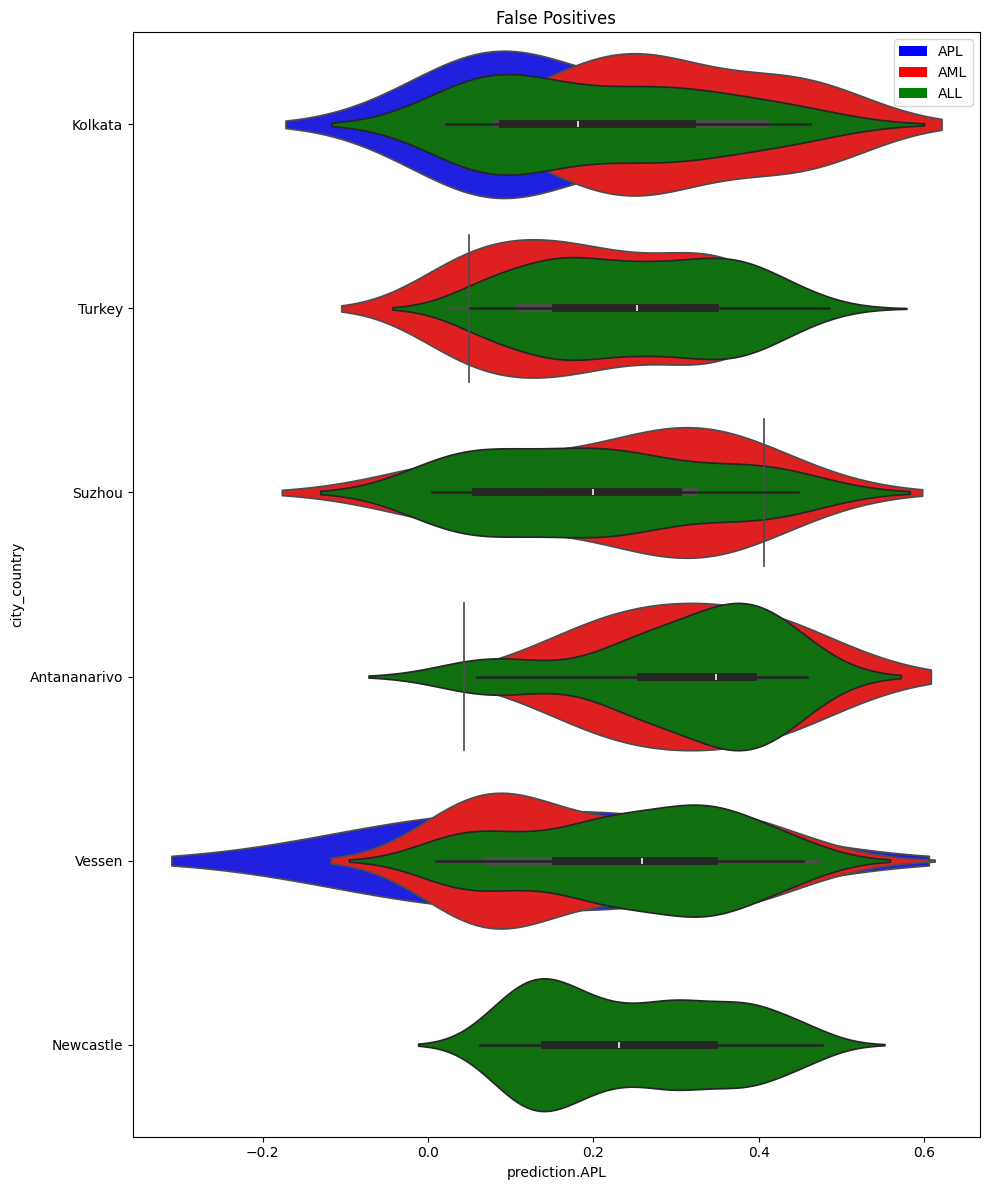

In [4]:

plt.figure(figsize=(10, 12))

# Define colors for each class
colors = {'APL': 'blue', 'AML': 'red', 'ALL': 'green'}

# Create separate violin plots with specific colors
apl_false = df_false[df_false['class'] == 'APL']
sns.violinplot(x='prediction.APL', y='city_country', data=apl_false, color=colors['APL'])

aml_false = df_false[df_false['class'] == 'AML']
sns.violinplot(x='prediction.AML', y='city_country', data=aml_false, color=colors['AML'])

all_false = df_false[df_false['class'] == 'ALL']
sns.violinplot(x='prediction.ALL', y='city_country', data=all_false, color=colors['ALL'])

# Create custom legend handles
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_elements)

plt.title('False Positives')
plt.tight_layout()
